# Analysis notebook for September  SC Pitx2 DREADD inhibition Cohort (09/2024)

## Description of experiment:  
This cohort was the first test cohort. It is amde up of 10 mice originally, 5x Pitx2-cre with cre-dependant hM4DGi expression in the left superior collicular intermediate layer, 5x WT control.  
DCZ used as agonsit for hM4DGi receptor at 0.5mg/kg

## Timeline of experiment:
<pre>
6 days training    - 3, 4, 5, 6, 7, 9th September 2024
Short cue training:
                   - 10th - 1000ms
                   - 11   - 500ms
                   - 12   - 100ms
                   - 13   - 50ms
DCZ agonist experiment:
                   - 17   - 50ms (No agonist injected - 50ms training/ baseline day)
                   - 18   - 50ms (0.5mg/kg DCZ injections 30mins before behaviour sessions, IP injection 10ul/g)
                   - 19   - Repeat of 18th
----- Data above this line corrupted by video compression error ------
-> Training break due to illness...
DCZ experiment continuation (October) -> 2x mice (mtao93-1a test & mtao93-1b ctrl) lost due to food restriction error.
                   - 1st  - Unlimited cue retraining
                   - 2    - 1000ms
                   - 3    - 500ms
                   - 4    - 500ms with DCZ injections
</pre>


# Setup:

## Imports:

In [3]:
# Imports:


from matplotlib import pyplot as plt
from Session_nwb import Session
from pathlib import Path
from Cohort_folder import Cohort_folder
import json
import os
import numpy as np
from IPython.display import clear_output
from datetime import datetime

fig_output = Path(os.getenv("fig_output"))
try:
    behaviour_data = Path(os.getenv("behaviour_data"))
except TypeError:
    print('"behaviour_data" environment variable does not exist.')
    try:
        behaviour_data = Path(r"/lmb/home/srogers/DATA")
    except TypeError:
        raise Exception("Tried using hex path but not available.")
    
september_cohort_AD = behaviour_data / "September_portable"
print(september_cohort_AD)

# Arduino_daq data:
September_cohort_directory_AD = behaviour_data / "September_portable"
september_cohort_AD = Cohort_folder(September_cohort_directory_AD, multi = True, portable_data = True, OEAB_legacy = False)
september_cohort_info_AD = september_cohort_AD.cohort
september_phases_AD = september_cohort_AD.phases()

# # Import plotting functions:
# import importlib
# from Session_nwb import Session


C:\Data\September_portable
Loading cohort info...


## Define session lists:

### September:

In [2]:
# Load session IDs from phases dict:

sess_500ms_training = [session for session in september_phases_AD['9c'] if session[:6] == "241008"]
sess_100ms_baseline = [session for session in september_phases_AD['9c'] if session[:6] == "241009"]
sess_100ms_agonsist = [session for session in september_phases_AD['9c'] if session[:6] == "241010"]

sess_100ms_agonsist_2 = [session for session in september_phases_AD['9c'] if session[:6] == "241014"]

sess_auditory_session_1 = [session for session in september_phases_AD['9c'] if session[:6] == "241016"]
# sess_auditory_session_2 = [session for session in september_phases_AD['9c'] if session[:6] == "241017"]



In [3]:
# Load in Session objects:

# sess_500ms_training_Sessions = [Session(september_cohort_AD.get_session(session)) for session in sess_500ms_training]
sess_100ms_baseline_Sessions = [Session(september_cohort_AD.get_session(session)) for session in sess_100ms_baseline]
sess_100ms_agonsist_Sessions = [Session(september_cohort_AD.get_session(session)) for session in sess_100ms_agonsist]
sess_100ms_agonsist_2_Sessions = [Session(september_cohort_AD.get_session(session)) for session in sess_100ms_agonsist_2]

Loading session 241009_172652_mtao90-1a...
Loading session 241009_172652_wtjx249-4c...
Loading session 241009_144044_mtao90-1b...
Loading session 241009_144044_mtao89-1a...
Loading session 241009_162032_wtjx249-4b...
Loading session 241009_162031_mtao89-1e...
Loading session 241009_182632_wtjp254-4d...
Loading session 241009_182632_mtao89-1d...
Loading session 241010_150416_mtao90-1a...
Loading session 241010_150416_wtjx249-4c...
Loading session 241010_120226_mtao90-1b...
Loading session 241010_120225_mtao89-1a...
Loading session 241010_132256_wtjx249-4b...
Loading session 241010_132256_mtao89-1e...
Loading session 241010_164705_wtjp254-4d...
Loading session 241010_164705_mtao89-1d...
Loading session 241014_163513_mtao90-1a...
Loading session 241014_163514_wtjx249-4c...
Loading session 241014_132150_mtao90-1b...
Loading session 241014_132149_mtao89-1a...
Loading session 241014_145948_wtjx249-4b...
Loading session 241014_145948_mtao89-1e...
Loading session 241014_181903_wtjp254-4d...
Lo

In [4]:
test_mice = ['mtao89-1d', 'mtao93-1a', 'mtao89-1e', 'mtao90-1a', 'mtao89-1a']
# test_mice = ['mtao93-1a', 'mtao89-1e', 'mtao90-1a', 'mtao89-1a']
# test_mice = ['mtao89-1d', 'mtao93-1a', 'mtao89-1e', 'mtao90-1a']

ctrl_mice = ['mtao90-1b', 'mtao93-1b', 'wtjx249-4b', 'wtjx249-4c', 'wtjp254-4d']

In [6]:
test_baseline = []
test_agonist = []
test_agonist_2 = []
ctrl_baseline = []
ctrl_agonist = []
ctrl_agonist_2 = []

# baseline behaviour sessions:
for session in sess_100ms_baseline_Sessions:
    session_ID = session.session_ID
    mouse = session_ID[14:]
    if mouse in test_mice:
        test_baseline.append(session)
        # print(f"Baseline test: {session_ID}")
    elif mouse in ctrl_mice:
        ctrl_baseline.append(session)
        # print(f"Baseline control: {session_ID}")
    else:
        print(f"Mouse {mouse} not in test or control mice list.")

# agonist behaviour sessions:
for session in sess_100ms_agonsist_Sessions:
    session_ID = session.session_ID
    mouse = session_ID[14:]
    if mouse in test_mice:
        test_agonist.append(session)
        # print(f"Agonist test: {session_ID}")
    elif mouse in ctrl_mice:
        ctrl_agonist.append(session)
        # print(f"Agonist control: {session_ID}")
    else:
        print(f"Mouse {mouse} not in test or control mice list.")

# agonist behaviour sessions:
for session in sess_100ms_agonsist_2_Sessions:
    session_ID = session.session_ID
    mouse = session_ID[14:]
    if mouse in test_mice:
        test_agonist_2.append(session)
        # print(f"Agonist 2 test: {session_ID}")
    elif mouse in ctrl_mice:
        ctrl_agonist_2.append(session)
        # print(f"Agonist 2 control: {session_ID}")
    else:
        print(f"Mouse {mouse} not in test or control mice list.")



In [7]:
import PP_plot_performance

Saving plot as SVG to: '/lmb/home/srogers/DATA/Fig_output/September inhib dreadds plots/20241018_032007/20241018_032008_angular_performance_line_all_trials.svg'
Saving plot as PNG to: '/lmb/home/srogers/DATA/Fig_output/September inhib dreadds plots/20241018_032007/20241018_032008_angular_performance_line_all_trials.png'


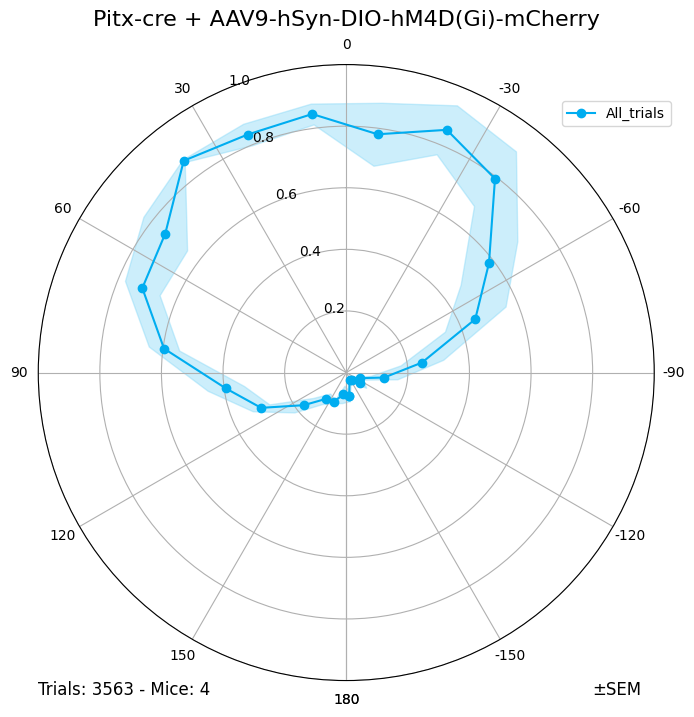

Saving plot as SVG to: '/lmb/home/srogers/DATA/Fig_output/September inhib dreadds plots/20241018_032007/20241018_032008_angular_performance_line_all_trials_0.svg'
Saving plot as PNG to: '/lmb/home/srogers/DATA/Fig_output/September inhib dreadds plots/20241018_032007/20241018_032008_angular_performance_line_all_trials_0.png'


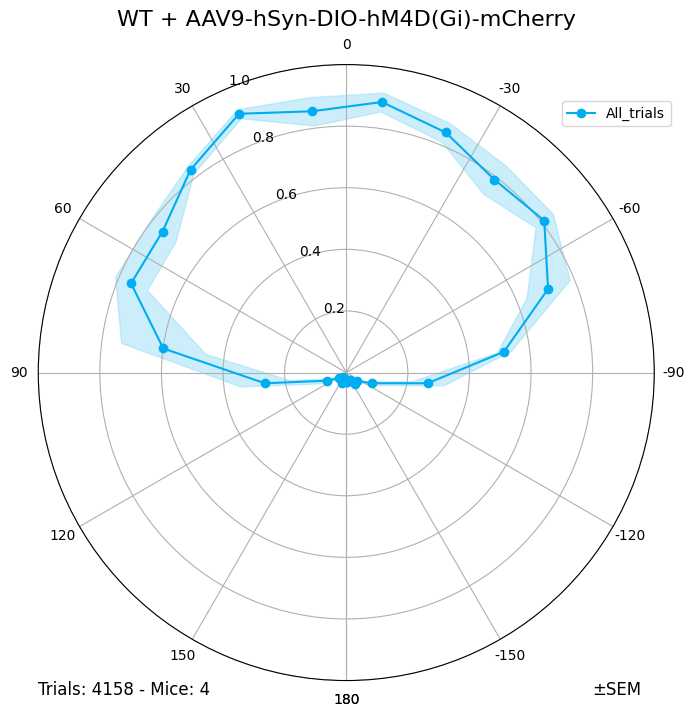

In [8]:
importlib.reload(PP_plot_performance)
from datetime import datetime

plot_out_folder = "September inhib dreadds plots"
fig_output = Path(r"/lmb/home/srogers/DATA/Fig_output")
date_time = datetime.now().strftime("%Y%m%d_%H%M%S")
new_output = fig_output / plot_out_folder / date_time

test_total = test_agonist + test_agonist_2
ctrl_total = ctrl_agonist + ctrl_agonist_2

# PP_plot_performance.plot_performance_by_angle(test_baseline, 
#                                               title = 'test mice', 
#                                               bin_mode = 'manual', 
#                                               num_bins = 24, 
#                                               plot_mode='radial', 
#                                               cue_modes=['all_trials'],
#                                               error_bars='SEM',
#                                               output_path=new_output,
#                                               plot_individual_mice=False)
                                              

# PP_plot_performance.plot_performance_by_angle(ctrl_baseline, 
#                                               title = 'control mice', 
#                                               bin_mode = 'manual', 
#                                               num_bins = 24, 
#                                               plot_mode='radial', 
#                                               cue_modes=['all_trials'],
#                                               error_bars='SEM',
#                                               output_path=new_output)


# PP_plot_performance.plot_performance_by_angle(test_agonist, 
#                                               title = 'Pitx-cre + AAV9-hSyn-DIO-hM4D(Gi)-mCherry', 
#                                               bin_mode = 'manual', 
#                                               num_bins = 24, 
#                                               plot_mode='radial', 
#                                               cue_modes=['all_trials'],
#                                               error_bars='SEM',
#                                               output_path=new_output,
#                                               plot_individual_mice=True)
                                              

# PP_plot_performance.plot_performance_by_angle(ctrl_agonist, 
#                                               title = 'WT + AAV9-hSyn-DIO-hM4D(Gi)-mCherry', 
#                                               bin_mode = 'manual', 
#                                               num_bins = 24, 
#                                               plot_mode='radial', 
#                                               cue_modes=['all_trials'],
#                                               error_bars='SEM',
#                                               output_path=new_output)

# PP_plot_performance.plot_performance_by_angle(test_agonist_2, 
#                                               title = 'Pitx-cre + AAV9-hSyn-DIO-hM4D(Gi)-mCherry', 
#                                               bin_mode = 'manual', 
#                                               num_bins = 24, 
#                                               plot_mode='radial', 
#                                               cue_modes=['all_trials'],
#                                               error_bars='SEM',
#                                               output_path=new_output,
#                                               plot_individual_mice=True)
                                              

# PP_plot_performance.plot_performance_by_angle(ctrl_agonist_2, 
#                                               title = 'WT + AAV9-hSyn-DIO-hM4D(Gi)-mCherry', 
#                                               bin_mode = 'manual', 
#                                               num_bins = 24, 
#                                               plot_mode='radial', 
#                                               cue_modes=['all_trials'],
#                                               error_bars='SEM',
#                                               output_path=new_output)

PP_plot_performance.plot_performance_by_angle(test_total, 
                                              title = 'Pitx-cre + AAV9-hSyn-DIO-hM4D(Gi)-mCherry', 
                                              bin_mode = 'manual', 
                                              num_bins = 24, 
                                              plot_mode='radial', 
                                              cue_modes=['all_trials'],
                                              error_bars='SEM',
                                              output_path=new_output,
                                              plot_individual_mice=False)
                                              

PP_plot_performance.plot_performance_by_angle(ctrl_total, 
                                              title = 'WT + AAV9-hSyn-DIO-hM4D(Gi)-mCherry', 
                                              bin_mode = 'manual', 
                                              num_bins = 24, 
                                              plot_mode='radial', 
                                              cue_modes=['all_trials'],
                                              error_bars='SEM',
                                              output_path=new_output)


In [9]:
import PP_plot_performance_multi

Saving plot as SVG to: '/lmb/home/srogers/DATA/Fig_output/September inhib dreadds plots multi/20241018_032023/20241018_032023_angular_performance_line_all_trials.svg'
Saving plot as PNG to: '/lmb/home/srogers/DATA/Fig_output/September inhib dreadds plots multi/20241018_032023/20241018_032023_angular_performance_line_all_trials.png'


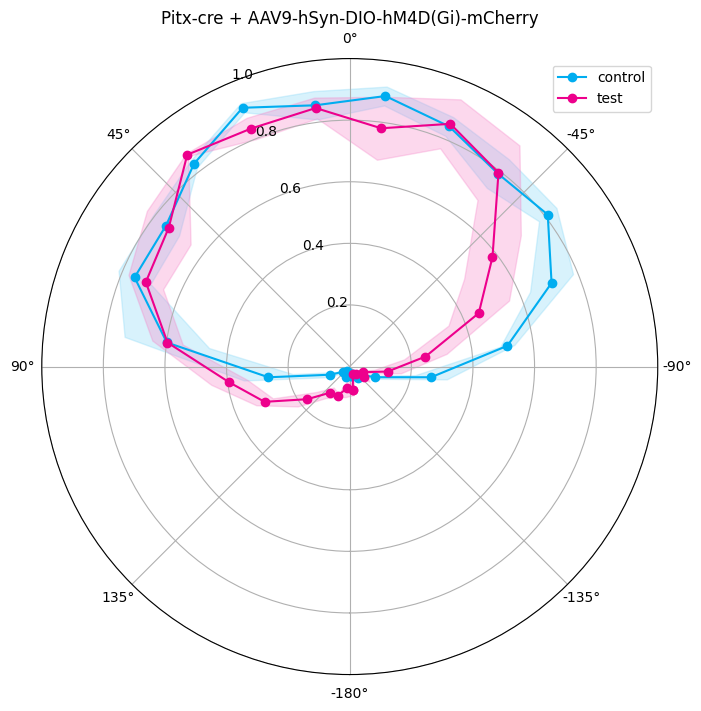

In [10]:
importlib.reload(PP_plot_performance_multi)
from datetime import datetime

plot_out_folder = "September inhib dreadds plots multi"
fig_output = Path(r"/lmb/home/srogers/DATA/Fig_output")
date_time = datetime.now().strftime("%Y%m%d_%H%M%S")
new_output = fig_output / plot_out_folder / date_time

sessions = {'control': ctrl_agonist, 'test': test_agonist}

total_sessions = {'control': ctrl_total, 'test': test_total}    


# PP_plot_performance_multi.plot_performance_by_angle(sessions, 
#                                               title = 'Pitx-cre + AAV9-hSyn-DIO-hM4D(Gi)-mCherry', 
#                                               bin_mode = 'manual',
#                                               num_bins = 24,
#                                               plot_mode='radial',
#                                               error_bars='SEM',
#                                               output_path=new_output,
#                                               plot_individual_mice=False)

PP_plot_performance_multi.plot_performance_by_angle(total_sessions, 
                                              title = 'Pitx-cre + AAV9-hSyn-DIO-hM4D(Gi)-mCherry', 
                                              bin_mode = 'manual',
                                              num_bins = 24,
                                              plot_mode='radial',
                                              error_bars='SEM',
                                              output_path=new_output,
                                              plot_individual_mice=False)
                                              


In [33]:
import PP_plot_performance_bias_adjusted
import PP_plot_performance_bias_adjusted_multi

Saving plot as SVG to: '/lmb/home/srogers/DATA/Fig_output/September inhib dreadds plots multi/20241017_193040/20241017_193040_angular_performance_radial.svg'
Saving plot as PNG to: '/lmb/home/srogers/DATA/Fig_output/September inhib dreadds plots multi/20241017_193040/20241017_193040_angular_performance_radial.png'


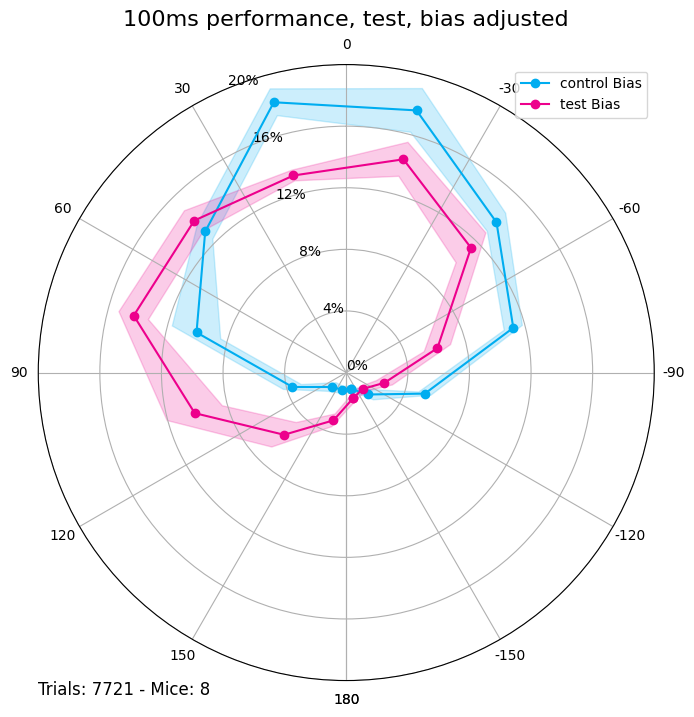

Saving plot as SVG to: '/lmb/home/srogers/DATA/Fig_output/September inhib dreadds plots multi/20241017_193040/20241017_193040_angular_performance_radial_0.svg'
Saving plot as PNG to: '/lmb/home/srogers/DATA/Fig_output/September inhib dreadds plots multi/20241017_193040/20241017_193040_angular_performance_radial_0.png'


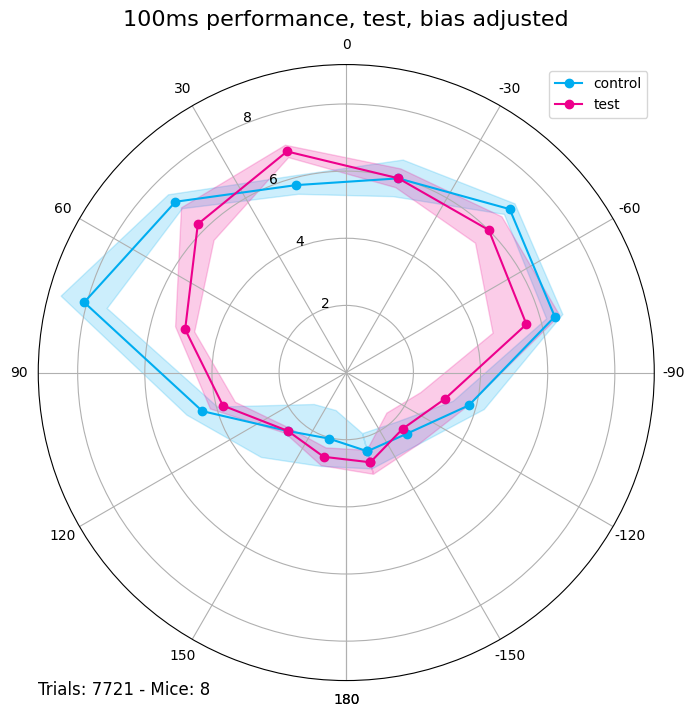

In [40]:
importlib.reload(PP_plot_performance_bias_adjusted)
importlib.reload(PP_plot_performance_bias_adjusted_multi)

plot_out_folder = "September inhib dreadds plots multi"
fig_output = Path(r"/lmb/home/srogers/DATA/Fig_output")
date_time = datetime.now().strftime("%Y%m%d_%H%M%S")
new_output = fig_output / plot_out_folder / date_time

sessions = {'control': ctrl_total, 'test': test_total}

# excluding mouse wtjp254-4b.
# PP_plot_performance_bias_adjusted.plot_performance_by_angle(test_agonist, 
#                                               title = '100ms performance, test, bias adjusted', 
#                                               bin_mode = 'manual', 
#                                               cue_mode='both',
#                                               error_bars='SEM',
#                                               plot_individual_mice=False,
#                                               plot_bias=True,
#                                               output_path=new_output)

# PP_plot_performance_bias_adjusted.plot_performance_by_angle(ctrl_agonist, 
#                                               title = '100ms performance, test, bias adjusted', 
#                                               bin_mode = 'manual', 
#                                               cue_mode='both',
#                                               error_bars='SEM',
#                                               plot_individual_mice=False,
#                                               plot_bias=True,
#                                               output_path=new_output)

# PP_plot_performance_bias_adjusted.plot_performance_by_angle(test_total, 
#                                               title = '100ms performance, test, bias adjusted', 
#                                               bin_mode = 'manual', 
#                                               cue_mode='both',
#                                               error_bars='SEM',
#                                               plot_individual_mice=False,
#                                               plot_bias=True,
#                                               output_path=new_output)

# PP_plot_performance_bias_adjusted.plot_performance_by_angle(ctrl_total, 
#                                               title = '100ms performance, test, bias adjusted', 
#                                               bin_mode = 'manual', 
#                                               cue_mode='both',
#                                               error_bars='SEM',
#                                               plot_individual_mice=False,
#                                               plot_bias=True,
#                                               output_path=new_output)

PP_plot_performance_bias_adjusted_multi.plot_performance_by_angle(sessions, 
                                              title = '100ms performance, test, bias adjusted', 
                                              bin_mode = 'manual', 
                                              cue_mode='both',
                                              error_bars='SEM',
                                              plot_bias=True,
                                              output_path=new_output)

PP_plot_performance_bias_adjusted_multi.plot_performance_by_angle(sessions, 
                                              title = '100ms performance, test, bias adjusted', 
                                              bin_mode = 'manual', 
                                              cue_mode='both',
                                              error_bars='SEM',
                                              plot_bias=False,
                                              output_path=new_output)

# Plotting audio trials task:

In [43]:
Sessions_auditory_sessions_1 = [Session(september_cohort_AD.get_session(session)) for session in sess_auditory_session_1]

full_task_sessions = ['241016_125953_mtao89-1a', '']

Loading session 241016_165340_mtao90-1a...
Loading session 241016_164146_mtao90-1a...
Loading session 241016_155300_mtao90-1a...
Loading session 241016_165341_wtjx249-4c...
Loading session 241016_164146_wtjx249-4c...
Loading session 241016_155300_wtjx249-4c...
Loading session 241016_125059_mtao90-1b...
Loading session 241016_125058_mtao89-1a...
Loading session 241016_125953_mtao89-1a...
Loading session 241016_142157_wtjx249-4b...
Loading session 241016_142156_mtao89-1e...
Loading session 241016_174152_wtjp254-4d...
Loading session 241016_173711_wtjp254-4d...
Loading session 241016_174151_mtao89-1d...
Loading session 241016_173711_mtao89-1d...


In [ ]:
importlib.reload(PP_plot_performance)
fig_output = Path(os.getenv("fig_output"))
from datetime import datetime
plot_out_folder = "allo-ego session plots September 24"
date_time = datetime.now().strftime("%Y%m%d_%H%M%S")
new_output = fig_output / plot_out_folder / date_time

PP_plot_performance.plot_performance_by_angle(Sessions_auditory_sessions_1, 
                                              title = 'Audio vs visual - line plot', 
                                              bin_mode = 'manual', 
                                              trials_per_bin=100, 
                                              plot_mode='linear_comparison', 
                                              cue_modes=['visual_trials', 'audio_trials'],
                                              error_bars='SEM',
                                              output_path=new_output,
                                              plot_individual_mice=False,
                                              exclusion_mice=[])

PP_plot_performance.plot_performance_by_angle(Sessions_auditory_sessions_1, 
                                              title = 'Audio vs visual - radial plot', 
                                              bin_mode = 'manual', 
                                              trials_per_bin=100, 
                                              plot_mode='radial', 
                                              cue_modes=['visual_trials', 'audio_trials'],
                                              error_bars='SEM',
                                              output_path=new_output,
                                              plot_individual_mice=False,
                                              exclusion_mice=[])